# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Muhammad Rafi Abhinaya
- **Email:** mr.abhinaya26@gmail.com
- **ID Dicoding:** rafiabhinaya

## Menentukan Pertanyaan Bisnis

- Which City and State contribute the most to the revenue?
- How are our customer's order satisfaction, measured through reviews?
- RFM Analysis

## Import Semua Packages/Library yang Digunakan

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
# read orders dataset
orders_df = pd.read_csv('data/orders_dataset.csv')
columns = ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']
orders_df = orders_df[columns]
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [3]:
# read order reviews dataset
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
columns = ['review_id', 'order_id', 'review_score']
order_reviews_df = order_reviews_df[columns]
order_reviews_df.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [4]:
# read order items dataset
order_items_df = pd.read_csv('data/order_items_dataset.csv')
columns = ['order_id', 'order_item_id','product_id', 'price', 'freight_value']
order_items_df = order_items_df[columns]
order_items_df.head()

,order_id,order_item_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14


In [5]:
# read customers dataset
customers_df = pd.read_csv('data/customers_dataset.csv')
columns = ['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']
customers_df = customers_df[columns]
customers_df.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


**Insight:**

To answer the business questions, we would need to dive into the datasets provided. Not all datasets are relevant for this analysis, the datasets used in this analysis are as follow:
- customers_dataset
- order_items_dataset
- order_reviews_dataset
- orders_dateset

To reduce distraction, some datasets will only use the columns that are relevant to the business questions.

### Assessing Data

In [6]:
# check orders dataset
print(orders_df.info(), '\n')

# check null
print('Null Values: \n',orders_df.isna().sum(), '\n')

# check duplicates
print('Duplicates: ',int(orders_df.duplicated().sum()))

# describe
print(orders_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB
None 

Null Values: 
 order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
dtype: int64 

Duplicates:  0
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1    

In [7]:
# check values in order_status
orders_df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

**Insight:**

From the assesment above, we can conclude that:
- The order_purchase_timestamp data type is incorrect.
- There are no null values.
- There are no duplicates.
- Not much relevant information can be concluded from `.describe()`.

If we check the values inside the `order_status` column, we can see that there is a 'canceled' and 'unavailable' status. For this analysis, we only need to analyze orders where the payments are successful. So, we will drop the rows with the order status 'canceled' and 'unavailable.


In [8]:
# check order reviews dataset
print(order_reviews_df.info(), '\n')

# check null
print('Null Values: \n',order_reviews_df.isna().sum(), '\n')

# check duplicates
print('Duplicates: ',int(order_reviews_df.duplicated().sum()))

# describe
print(order_reviews_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
None 

Null Values: 
 review_id       0
order_id        0
review_score    0
dtype: int64 

Duplicates:  0
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


**Insight:**

From the assesment above, we can conclude that:
- The data types are correct.
- There are no null values.
- There are no duplicates.
- We can see that most `review_score` are above three stars.

In [9]:
# check order items dataset
print(order_items_df.info(), '\n')

# check null
print('Null Values: \n',order_items_df.isna().sum(), '\n')

# check duplicates
print('Duplicates: ',int(order_items_df.duplicated().sum()))

# describe
print(order_items_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB
None 

Null Values: 
 order_id         0
order_item_id    0
product_id       0
price            0
freight_value    0
dtype: int64 

Duplicates:  0
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%      

**Insight:**

From the assesment above, we can conclude that:
- The data types are correct.
- There are no null values.
- There are no duplicates.
- All good.

In [10]:
# check customers dataset
print(customers_df.info(), '\n')

# check null
print('Null Values: \n',customers_df.isna().sum(), '\n')

# check duplicates
print('Duplicates: ',int(customers_df.duplicated().sum()))

# describe
print(customers_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


None 

Null Values: 
 customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
dtype: int64 

Duplicates:  0
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   

       customer_city customer_state  
count          99441          99441  
unique          4119             27  
top        sao paulo             SP  
freq           15540          41746  


**Insight:**

From the assesment above, we can conclude that:
- The data types are correct.
- There are no null values.
- There are no duplicates.
- All good.

### Cleaning Data

In [11]:
# orders_df
# change dtype to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_purchase_timestamp'] = orders_df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13


In [12]:
# drop rows with irrelevant order status
orders_df = orders_df[~((orders_df['order_status'] == 'canceled') | 
                        (orders_df['order_status'] == 'unavailable'))]
orders_df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'created',
       'approved'], dtype=object)

**Insight:**

orders_df
- Changed `order_purchase_timestamp` to datetime.
- Dropped rows with irrelevant order statuses.

## Exploratory Data Analysis (EDA)

### Explore order_items_df

In [13]:
# add new total price column
order_items_df['total_price'] = order_items_df['price'] + order_items_df['freight_value']
order_items_df.head()

,order_id,order_item_id,product_id,price,freight_value,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,218.04


In [14]:
# see orders with the highest prices
order_items_df.groupby('order_id').agg({
    'order_item_id':'max',
    'total_price':'sum'
}).sort_values('total_price', ascending=False).head()

,order_item_id,total_price
order_id,,
03caa2c082116e1d31e67e9ae3700499,8,13664.08
736e1922ae60d0d6a89247b851902527,4,7274.88
0812eb902a67711a1cb742b3cdaa65ae,1,6929.31
fefacc66af859508bf1a7934eab1e97f,1,6922.21
f5136e38d1a14a4dbd87dff67da82701,1,6726.66


In [15]:
# see orders with most items
order_items_df.groupby('order_id').agg({
    'order_item_id':'max',
    'total_price':'sum'
}).sort_values('order_item_id', ascending=False).head()

,order_item_id,total_price
order_id,,
8272b63d03f5f79c56e9e4120aec44ef,21,196.17
1b15974a0141d54e36626dca3fdc731a,20,2202.40
ab14fdcfbe524636d65ee38360e22ce8,20,2262.80
9ef13efd6949e4573a18964dd1bbe7f5,15,783.00
428a2f660dc84138d969ccd69a0ab6d5,15,1225.65


**Insight:**
- The highest price of an order is 13664.08.
- The most items in a single order is 21 items.

### Explore orders_id and customers_id

In [16]:
# merge order_df and customer_df
order_and_customer_df = pd.merge(left=orders_df,
                right=customers_df,
                how='left',
                left_on='customer_id',
                right_on='customer_id')

# show df
order_and_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP


In [17]:
# show city with the most orders
order_and_customer_df.groupby('customer_city').agg({'order_id':'nunique'}).sort_values('order_id',ascending=False).head()

,order_id
customer_city,
sao paulo,15291
rio de janeiro,6801
belo horizonte,2737
brasilia,2112
curitiba,1502


In [18]:
# show city with the most orders
order_and_customer_df.groupby('customer_state').agg({'order_id':'nunique'}).sort_values('order_id',ascending=False).head()

,order_id
customer_state,
SP,41127
RJ,12698
MG,11496
RS,5417
PR,4983


**Insight:**
- The city with the most orders is Sao Paulo.
- The state with the most orders is SP.

### Explore orders_df, orders_df, and order_items_df

In [19]:
# group order_items_df
order_total_price_df = order_items_df.groupby('order_id').agg({
    'order_item_id':'max',
    'total_price':'sum'
}).reset_index()

# check df
order_total_price_df.head()

,order_id,order_item_id,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,259.83
2,000229ec398224ef6ca0657da4fc703e,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04


In [20]:
# merge df
order_customer_total_price_df = pd.merge(left=order_and_customer_df,
                                         right=order_total_price_df,
                                         how='inner',
                                         left_on='order_id',
                                         right_on='order_id')

# check df
order_customer_total_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98199 entries, 0 to 98198
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  98199 non-null  object 
 1   customer_id               98199 non-null  object 
 2   order_status              98199 non-null  object 
 3   order_purchase_timestamp  98199 non-null  object 
 4   customer_unique_id        98199 non-null  object 
 5   customer_city             98199 non-null  object 
 6   customer_state            98199 non-null  object 
 7   order_item_id             98199 non-null  int64  
 8   total_price               98199 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 6.7+ MB


In [21]:
# groupby city
order_customer_total_price_df.groupby('customer_city').agg({'total_price':'sum'}).sort_values('total_price',ascending=False).head()

,total_price
customer_city,
sao paulo,2150331.80
rio de janeiro,1147497.86
belo horizonte,411471.22
brasilia,350402.91
curitiba,240767.02


In [22]:
# groupby city
order_customer_total_price_df.groupby('customer_state').agg({'total_price':'sum'}).sort_values('total_price',ascending=False).head()

,total_price
customer_state,
SP,5878132.06
RJ,2115667.56
MG,1843074.43
RS,877290.59
PR,794196.61


**Insight:**
- The city producing the most revenue is Sao Paulo.
- The state producing the most revenue is SP.

### Explore all_df

In [23]:
# group reviews by order
order_reviews_grouped_df = order_reviews_df.groupby('order_id').agg({
                    'review_score':'mean'
                    }).reset_index()

# change averaged reviews to int
order_reviews_grouped_df['review_score'] = order_reviews_grouped_df['review_score'].astype(int)

# check df
order_reviews_grouped_df.head()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5
1,00018f77f2f0320c557190d7a144bdd3,4
2,000229ec398224ef6ca0657da4fc703e,5
3,00024acbcdf0a6daa1e931b038114c75,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,5


In [24]:
# merge df
all_df = pd.merge(left=order_customer_total_price_df,
                  right=order_reviews_grouped_df,
                  how='left',
                  left_on='order_id',
                  right_on='order_id')

# check df 
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98199 entries, 0 to 98198
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  98199 non-null  object 
 1   customer_id               98199 non-null  object 
 2   order_status              98199 non-null  object 
 3   order_purchase_timestamp  98199 non-null  object 
 4   customer_unique_id        98199 non-null  object 
 5   customer_city             98199 non-null  object 
 6   customer_state            98199 non-null  object 
 7   order_item_id             98199 non-null  int64  
 8   total_price               98199 non-null  float64
 9   review_score              97467 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 7.5+ MB


In [25]:
# check review_score mean
mean_value = int(all_df['review_score'].mean())
all_df['review_score'].fillna(value=mean_value,inplace=True)
all_df['review_score'] =all_df['review_score'].astype(int)

# check df
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98199 entries, 0 to 98198
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  98199 non-null  object 
 1   customer_id               98199 non-null  object 
 2   order_status              98199 non-null  object 
 3   order_purchase_timestamp  98199 non-null  object 
 4   customer_unique_id        98199 non-null  object 
 5   customer_city             98199 non-null  object 
 6   customer_state            98199 non-null  object 
 7   order_item_id             98199 non-null  int64  
 8   total_price               98199 non-null  float64
 9   review_score              98199 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 7.5+ MB


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9848\4210527822.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df['review_score'].fillna(value=mean_value,inplace=True)


In [26]:
# check reviews
all_df.groupby('review_score').agg({
    'order_id':'nunique'
}).sort_values(by='review_score',ascending=False)

,order_id
review_score,
5,56852
4,19760
3,8078
2,3071
1,10438


**Insight:**

Most orders resulted in five stars

## Visualization & Explanatory Analysis

### Which City and State contribute the most to the revenue?

In [27]:
# group revenue by city
revenue_city_df = all_df.groupby('customer_city').agg({
    'total_price':'sum'
}).reset_index()
revenue_city_df.rename(columns={'customer_city':'city',
                            'total_price':'revenue'},
                            inplace=True)
revenue_city_df.head()

,city,revenue
0,abadia dos dourados,413.50
1,abadiania,1025.52
2,abaete,1946.81
3,abaetetuba,4672.27
4,abaiara,332.15


In [28]:
# group revenue by state
revenue_state_df = all_df.groupby('customer_state').agg({
    'total_price':'sum'
}).reset_index()
revenue_state_df.rename(columns={'customer_state':'state',
                            'total_price':'revenue'},
                            inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9848\79851812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city',
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9848\79851812.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state',


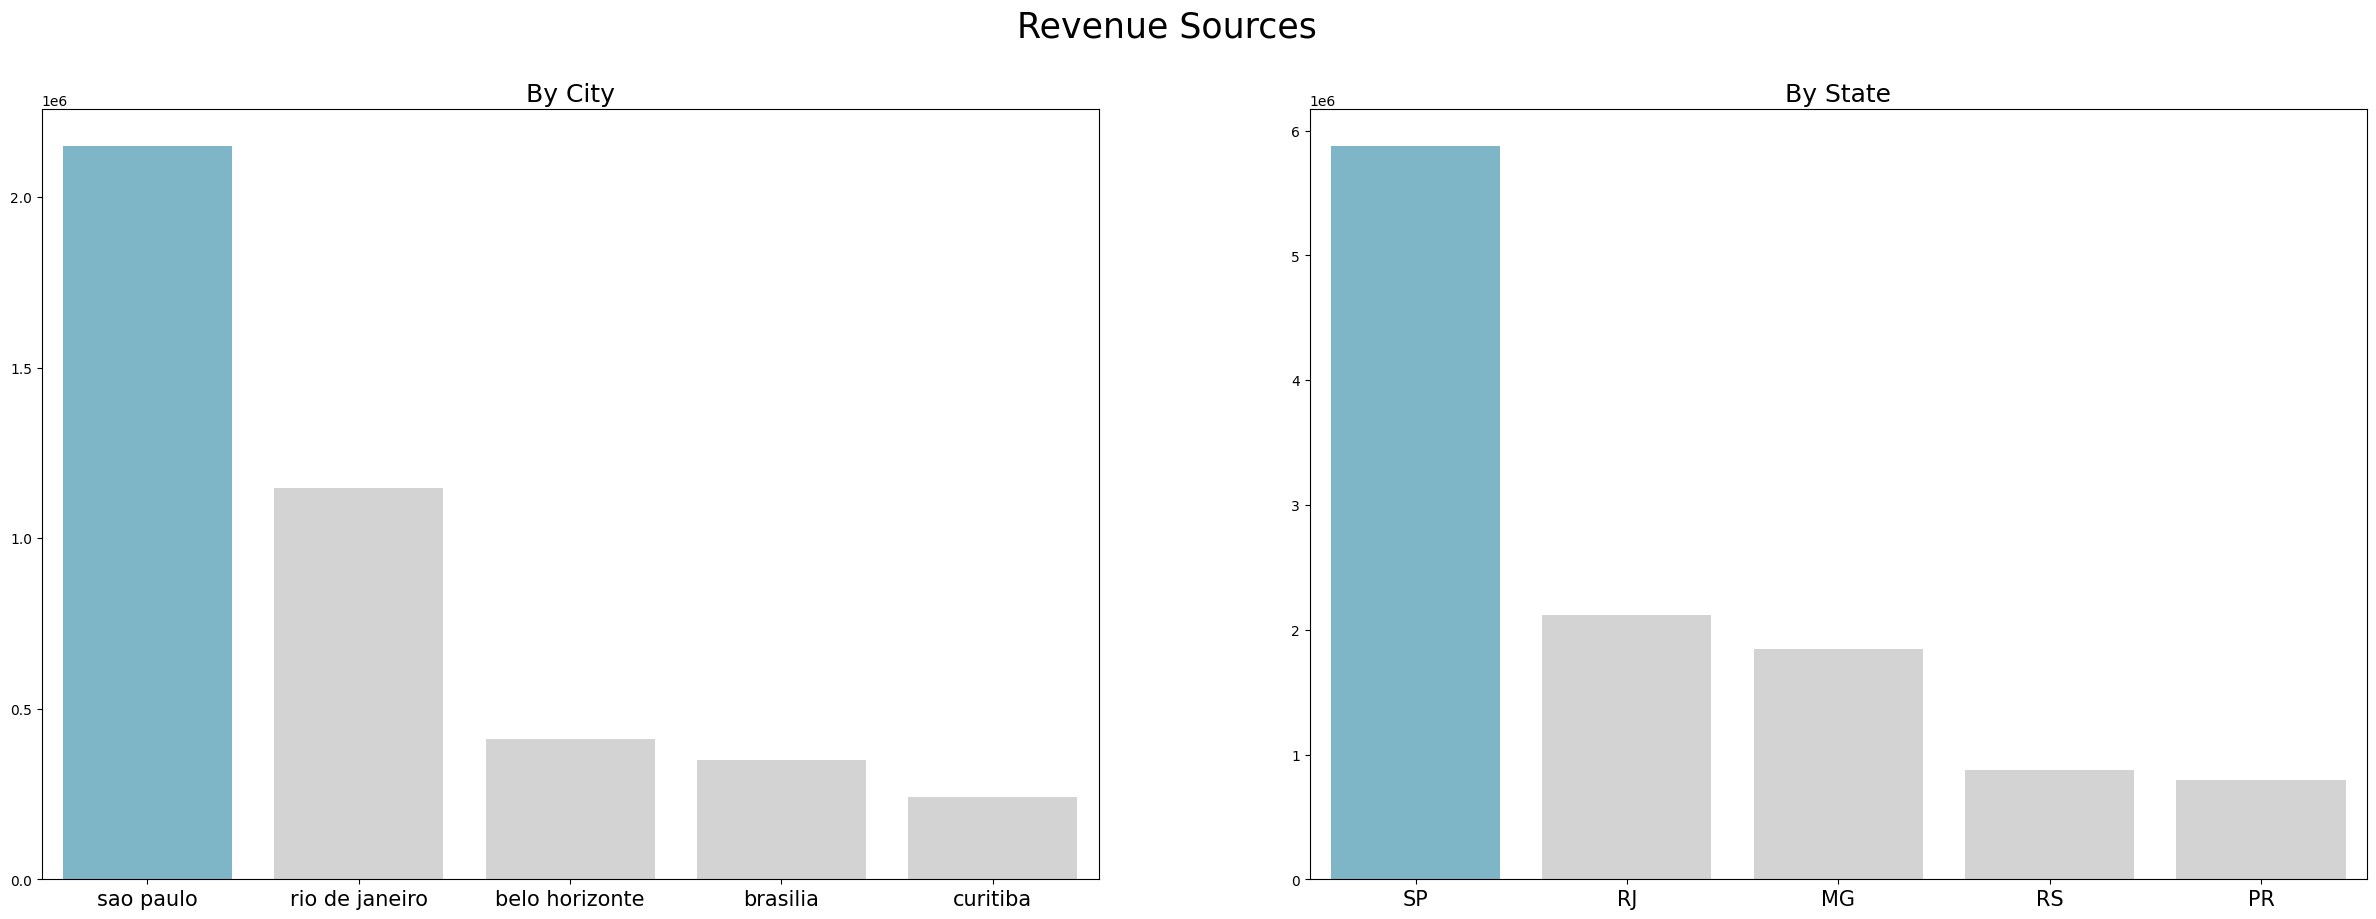

In [29]:
# create canvas
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
colors = colors3 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='city',
            y='revenue',
            data=revenue_city_df.sort_values('revenue',ascending=False).head(5),
            palette=colors,
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By City", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(x='state',
            y='revenue',
            data=revenue_state_df.sort_values('revenue',ascending=False).head(5),
            palette=colors,
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By State", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15)

plt.suptitle('Revenue Sources',fontsize=25)
plt.show()

**Insights:**

From the analysis above, it is concluded that the city of Sau Paolo generates the most revenue from orders, followed by Rio de Janeiro and Belo Horizonte. While the state producing the most revenue from orders is SP, followed by RJ and MG.

### How are our customer's order satisfaction, measured through reviews?

In [30]:
# create df
order_reviews_df = all_df.groupby('review_score').agg({
    'order_id':'nunique'
})
order_reviews_df.rename(columns={'order_id':'total_customers'}, inplace=True)
labels = order_reviews_df.index

# show df
order_reviews_df.head()

,total_customers
review_score,
1,10438
2,3071
3,8078
4,19760
5,56852


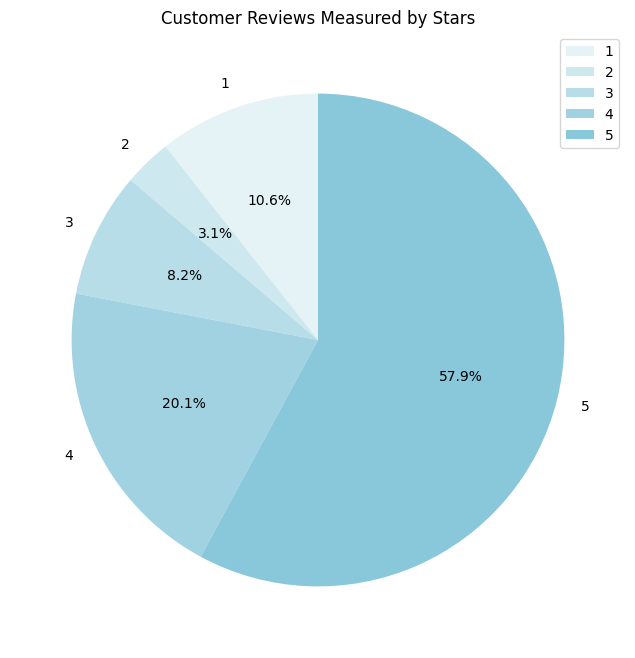

In [31]:
# create piechart
fig, ax = plt.subplots(figsize=(16,8))
colors = ["#E5F3F7", "#CEE8F0", "#B7DDE9", "#A0D2E2", "#89C7DB"]

plt.pie(order_reviews_df['total_customers'],
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90
        )
plt.title('Customer Reviews Measured by Stars')
plt.legend(labels, loc = 'best', bbox_to_anchor = (1.0,1.0))
plt.show()

**Insights:**

From the analysis above, it is concluded that most customers are satisfied with their orders, shown  by over 50% of orders receiving a 5-star review and 20% of orders receiving a 4-star review. But, it should be noted that there is quiet a few dissatisfied customers, shown by 10% of the orders receiving a 1-star review.

### RFM Analysis

In [32]:
# create df
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # takes latest order date
    "order_id": "nunique", # calculates total order
    "total_price": "sum" # calculates total reveneu produced
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last ordered (days)
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df['max_order_timestamp'])
recent_date = datetime.strptime('2018-09-04', "%Y-%m-%d")
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,294
1,000161a058600d5901f007fab4c27140,1,67.41,415
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,553
3,0002414f95344307404f0ace7a26f1d5,1,179.35,384
4,000379cdec625522490c315e70c7a9fb,1,107.01,155


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9848\2898415854.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9848\2898415854.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9848\2898415854.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), pa

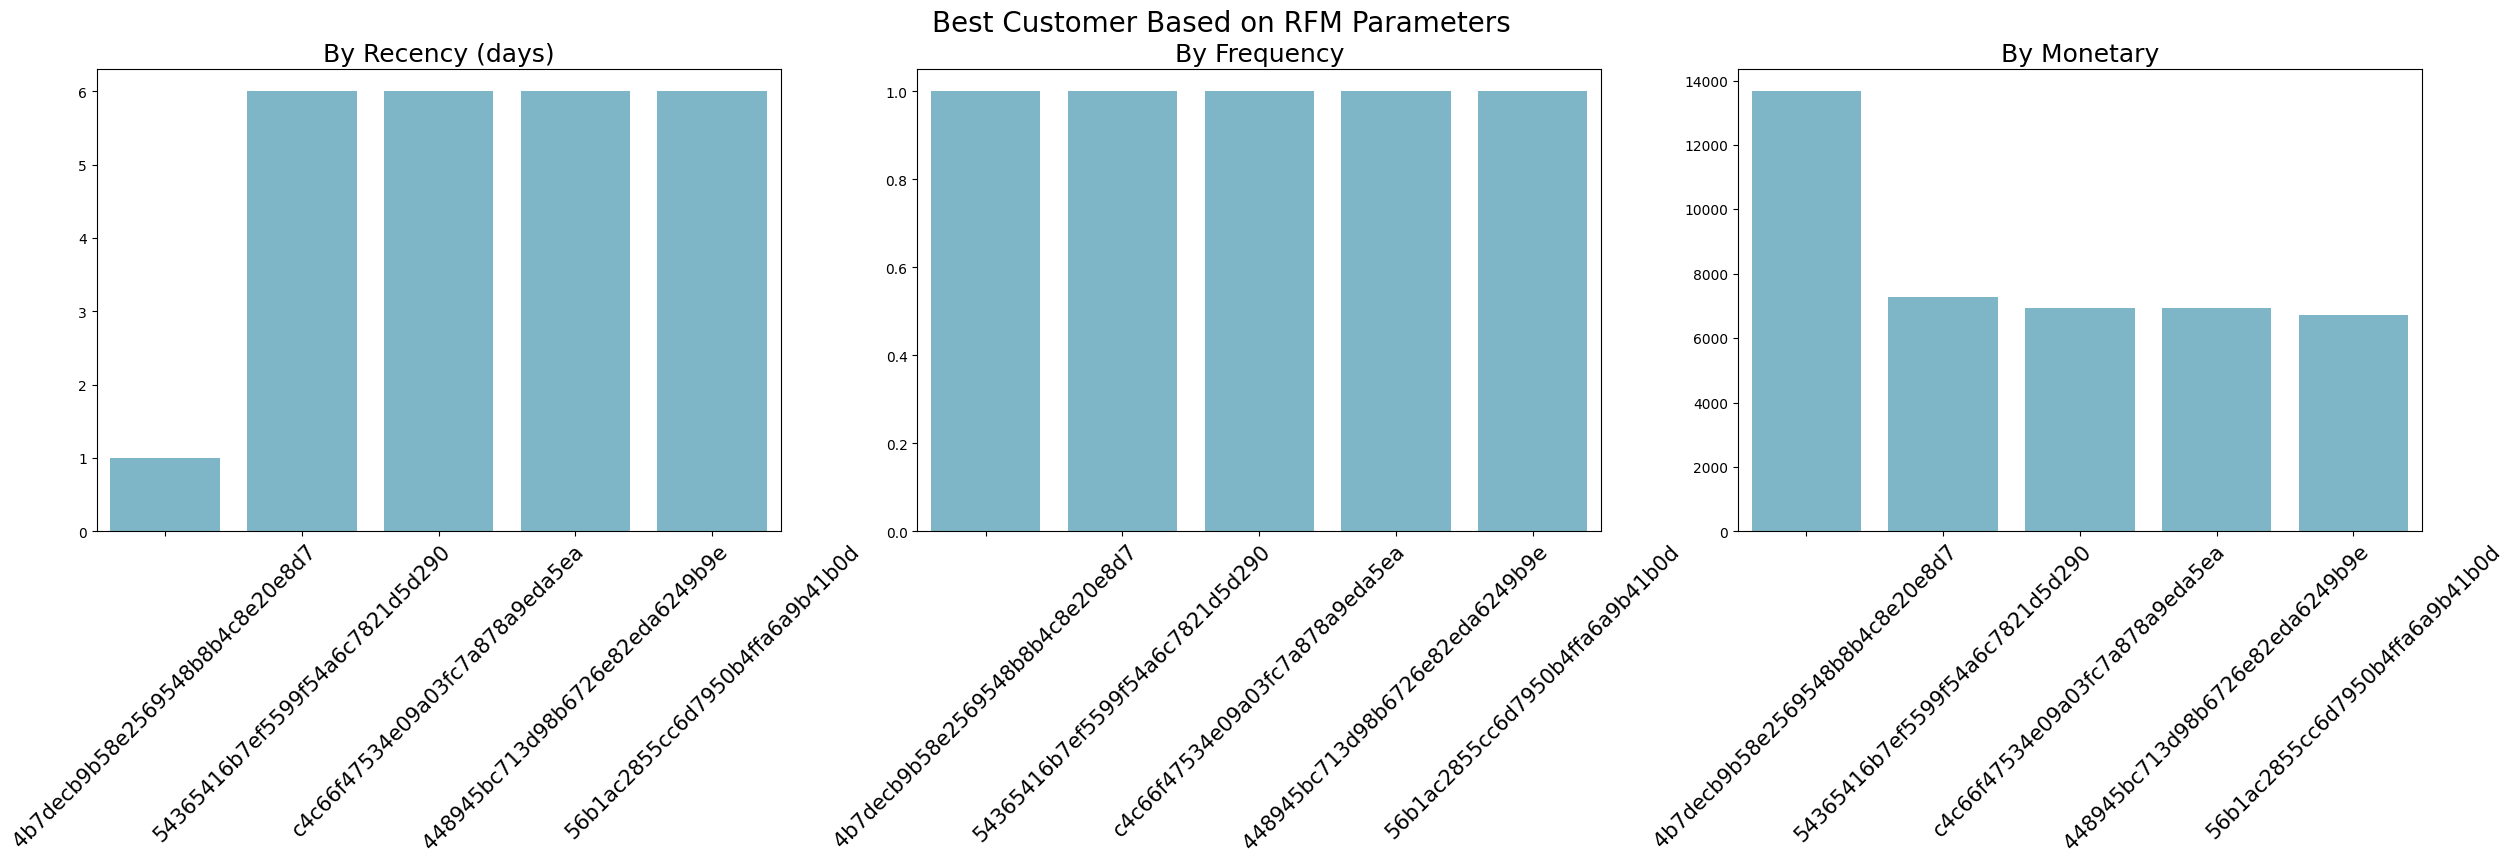

In [33]:
# create canvases
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# create recency barchart
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].tick_params(axis ='x', labelsize=15)

# create frequency barchart
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].tick_params(axis='x', labelsize=15)

# create monetary barchart
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

**Insight:**

RFM analysis is a marketing technique used to identify a company's most valuable customers based on three key factors, which are Recency, Frequency, and Monetary. By scoring customers on these three factors, businesses can segment their, helping them target their marketing efforts more effectively.

Through the RFM analysis it is concluded that
- The most recent order is one day ago.
- The most frequent order by customer is only once
- The most revenue out of a customer is 13664.0.

All of these are from a single customer, customer '4b7dec-'

## Conclusion

From The analysis above, it is concluded that:
- The city that contributes the most revenue through orders is the city of Sau Paulo and the state of SP
- Overall, customers are satisfied with their orders, proven by over 50% of the reviews being 5-star ratings. But, it should be noted that there is still a notable amount of 1-star reviews.
- Through the RMF analysis, we can conclude the most recent order is in just one day, the most frequent order by a customer is only 1, and the most revenue produced by a customer is 13664.0.

## Export Dataframe to .CSV

In [34]:
# export file
all_df.to_csv('dashboard/all_df.csv', index=False)